## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Imports

In [233]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#  Original Dataset

In [234]:
df = pd.read_csv('data/kc_house_data.csv')


# Exploratory Data Analysis

In [235]:
#21 columns, 21597 rows, so far only waterfront and yr_renovated are clearly missing values
#waterfront,view,condition,grade,sqft_basement,date are objects
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [236]:
#21 columns, 21597 rows, so far only waterfront and yr_renovated are clearly missing values
#date is object right now
#waterfront,view,condition,grade,sqft_basement are objects
#df.info()
        
#19422 nones in view
#df['view'].value_counts()

#df 3-13, poor to mansion, mostly in mid-range
#df['grade'].value_counts()

#2376 - waterfront
#63 - view
#3842 - yr_renovated
#df.isna().sum()

#no duplicates
#df.duplicated().sum()

In [237]:
#looks like categories with sqft tends to have outliers
#also maxes of bedrooms (33) and bathrooms (8) seem to be outliers
#most houses were built before the 2000s
#price 75-25 percentile range is 4.50-3.22
#Looks like there are 70 zipcodes in total
#Houses sold only in the year 2014-2015

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Outliers and Formatting

Removing 11+33 bedroom house

In [238]:
df = df.loc[df['bedrooms']<10]

REMOVING '?' IN SQFT_BASEMENT

In [239]:
#df['sqft_basement'].value_counts()
df = df.loc[df['sqft_basement']!= '?']

Changing date to datetime object

In [240]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year-2014
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

Splitting grade column into two columns, a numerical score (rating) and a string corresponding to that (condition)

In [241]:
rating = df['grade'].str.split(" ",expand=True)
df['rating'] = rating[0].astype(int)
df['condition'] = rating[1]
df.loc[df['condition'] == 'Very', 'condition'] = 'Amazing'


It is fair to assume that the houses that do not have a view are also not on the waterfront, which will help us maintain as much data as possible

In [242]:
df.loc[df['view'] == 'NONE', 'waterfront'] = 'NO'
df['waterfront'].value_counts()

NO     20734
YES      142
Name: waterfront, dtype: int64

If the column yr_renovated is 0, replace that value with the year it was built. This was done to maintain as much data as possible and is definitely a fair assumption.

In [243]:
df.loc[df['yr_renovated'] == 0, 'yr_renovated'] = df['yr_built']
df.dropna(subset = ['yr_renovated'],inplace=True)
df['yr_renovated'] = df['yr_renovated'].astype(int)

df[['yr_renovated','yr_built']] = df[['yr_renovated','yr_built']]-1900

In [244]:
df['yr_renovated'].min()

0

Getting rid of columns that are not helpful for analysis

In [245]:
df.drop(['date','day','grade','id','long','lat','year'],axis=1,inplace=True)


Changing data types for proper analysis

In [246]:
df[['bathrooms','floors']]= df[['bathrooms','floors']].astype(int)
df[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15',
           'sqft_lot15']] = df[['sqft_living','sqft_lot','sqft_above','sqft_basement',
                        'sqft_living15','sqft_lot15']].astype(float)


In [168]:
seattle = [98101,
98102,
98103, 
98104,
98105,
98106, 
98107, 
98108, 
98109, 
98112, 
98115, 
98116, 
98117, 
98118, 
98119, 
98121, 
98122, 
98125,
98126,
98133,
98134,
98136,
98144,
98154,
98164,
98174,
98195,
98199]



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,month,rating
0,221900.0,3,1,1180.0,5650.0,1,NO,NONE,Average,1180.0,0.0,55,55,98178,1340.0,5650.0,10,7
1,538000.0,3,2,2570.0,7242.0,2,NO,NONE,Average,2170.0,400.0,51,91,98125,1690.0,7639.0,12,7
3,604000.0,4,3,1960.0,5000.0,1,NO,NONE,Average,1050.0,910.0,65,65,98136,1360.0,5000.0,12,7
4,510000.0,3,2,1680.0,8080.0,1,NO,NONE,Good,1680.0,0.0,87,87,98074,1800.0,7503.0,2,8
5,1230000.0,4,4,5420.0,101930.0,1,NO,NONE,Excellent,3890.0,1530.0,101,101,98053,4760.0,101930.0,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2,1530.0,1131.0,3,NO,NONE,Good,1530.0,0.0,109,109,98103,1530.0,1509.0,5,8
21593,400000.0,4,2,2310.0,5813.0,2,NO,NONE,Good,2310.0,0.0,114,114,98146,1830.0,7200.0,2,8
21594,402101.0,2,0,1020.0,1350.0,2,NO,NONE,Average,1020.0,0.0,109,109,98144,1020.0,2007.0,6,7
21595,400000.0,3,2,1600.0,2388.0,2,NO,NONE,Good,1600.0,0.0,104,104,98027,1410.0,1287.0,1,8


Getting rid of all NAs after cleaning data

In [187]:
df.isna().sum()
df.dropna(inplace=True)


# CORRELATION MAP WITH EVERYTHING

In [18]:
df.corr().abs() > .75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,month,rating
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
sqft_basement,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False


# Outliers

In [19]:
#fig,ax=plt.subplots()
#sns.boxplot(ax=ax, data=final_df,y= (final_df.loc[(np.log(final_df['price']) <= 14.8)&(np.log(final_df['price']) >= 11.7)]))

In [ ]:
3.220000e+05	3.000000	1.750000	1430.000000	5.040000e+03	1.000000	1190.000000	1951.000000	0.000000	98033.000000	47.471100	-122.328000	1490.000000	5100.000000
50%	3.904930e+09	4.500000e+05	3.000000	2.250000	1910.000000	7.618000e+03	1.500000	1560.000000	1975.000000	0.000000	98065.000000	47.571800	-122.231000	1840.000000	7620.000000
75%	7.308900e+09	6.450000e+05

<AxesSubplot:ylabel='price'>

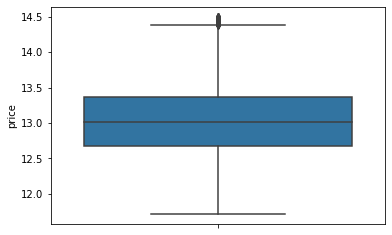

In [248]:
df= df.loc[(np.log(df['price']) <= 14.5)&(np.log(df['price']) >= 11.7)]
fig,ax=plt.subplots()
df
sns.boxplot(ax=ax, data=df,y= np.log(df['price']))

# NEED TO NORMALIZE PRICE DUE TO SKEW

<AxesSubplot:xlabel='price', ylabel='Count'>

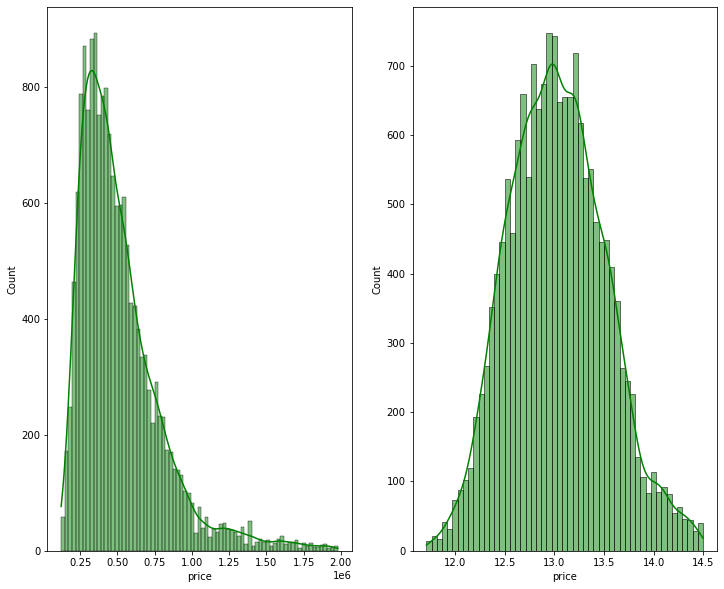

In [24]:
fig,ax =plt.subplots(nrows = 1, ncols=2,figsize=(12,10))
sns.histplot(df['price'],kde=True, color="green",ax=ax[0])
sns.histplot(np.log(df['price']),kde=True, color="green",ax=ax[1])

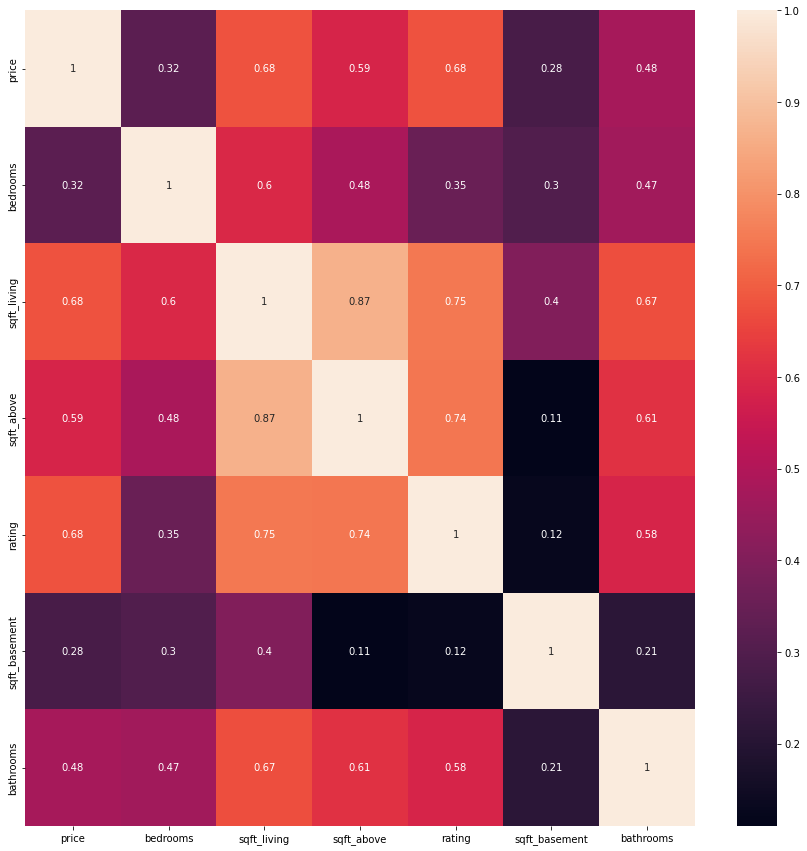

In [25]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df[['price','bedrooms','sqft_living','sqft_above','rating','sqft_basement','bathrooms']].corr().abs(),annot=True);


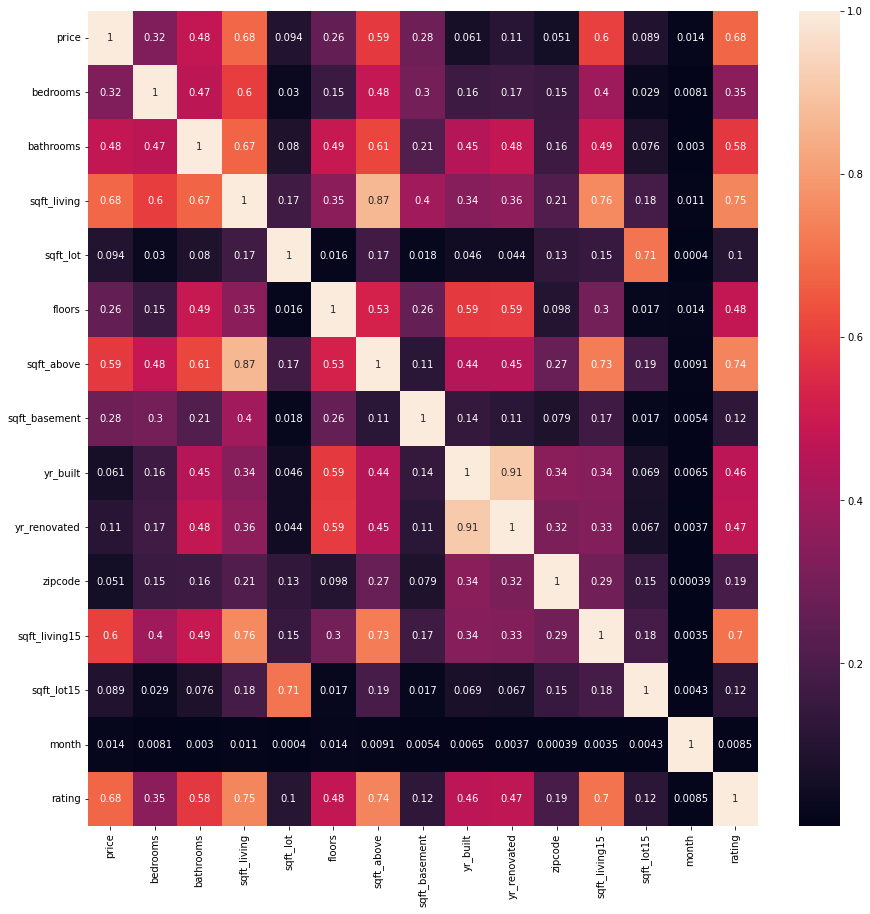

In [26]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr().abs(),annot=True);

In [303]:
df.corr() > 0.7
#multicollinearity & outliers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,month,rating
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False
sqft_basement,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False


#training

STep 1 : split into nums cats

Step 2: process

n = ss.fit_transform(nums)

c = one.fit_transform(cats)

Step 3: make n, c into df

Step 4: concat n and c 



# Test

STep 1 : split into nums cats
Step 2: process
n = ss.transform(nums)
c = one.transform(cats)

Step 3: make n, c into df
Step 4: concat n and c 



model = LR
y_hat = model.predict(X_test_proccessed)

#
rqscore for the model and test
mae,mse

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

# BASELINE MODEL -- Model 1 -- SQFT_LOT

# one hot encoding zipcodes 

ohe = OneHotEncoder()
 
ohezip = ohe.fit_transform(Xtrain_processed[['zipcode']])

ohe = pd.DataFrame(ohezip.todense(), columns = ohe.get_feature_names_out())

# Xtrain_processed.reset_index(inplace = True)
# ohe.reset_index(inplace= True)

final_x = pd.concat([Xtrain_processed, ohe], axis =1)

final_x.drop('zipcode', axis =1, inplace = True)




ohe_lr = LinearRegression()

ohe_lr.fit(final_x, y_train)

ohe_lr.score(final_x,y_train)



In [28]:
X = df[['sqft_living']]
y = df['price']

lr = LinearRegression()

lr.fit(X,y)
lr.score(X,y)

0.4624918987540553

In [29]:
cond_list = ['Poor','Fair','Low','Average','Good','Better','Amazing','Excellent','Luxury', 'Mansion']
view_list = ['NONE','FAIR','AVERAGE','GOOD','EXCELLENT']

ohe = OneHotEncoder(drop='first',sparse = False)
ss = StandardScaler()
o_enc = OrdinalEncoder(categories = [cond_list, view_list])

# MODEL 2 -- Everything

In [53]:
#Define X and y variables
X = df.drop(['price'],axis=1)
y = df['price']

#Train, test, split, here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#NUMERICAL
Xtrain_numerical = X_train.drop(['waterfront','view','condition'], axis=1)
Xtest_numerical = X_test.drop(['waterfront','view','condition'], axis=1)


Xtrain_numerical_scaled = pd.DataFrame(ss.fit_transform(Xtrain_numerical),
                              columns=Xtrain_numerical.columns,
                              index=Xtrain_numerical.index)
Xtest_numerical_scaled = pd.DataFrame(ss.transform(Xtest_numerical),columns=Xtest_numerical.columns,
                              index=Xtest_numerical.index)
#NOMINAL
Xtrain_nom = pd.DataFrame(X_train['waterfront'])
Xtest_nom = pd.DataFrame(X_test['waterfront'])

Xtrain_nom = pd.DataFrame(onehot_enc.fit_transform(Xtrain_nom),columns=Xtrain_nom.columns,index=Xtrain_nom.index)
Xtest_nom = pd.DataFrame(onehot_enc.transform(Xtest_nom),columns=Xtest_nom.columns,index=Xtest_nom.index)

#ORDINAL
ord_cat = ['condition', 'view']
Xtrain_ord = X_train[ord_cat]
Xtest_ord = X_test[ord_cat]

Xtrain_ord= pd.DataFrame(o_enc.fit_transform(Xtrain_ord),columns=Xtrain_ord.columns,index=Xtrain_ord.index)
Xtest_ord = pd.DataFrame(o_enc.transform(Xtest_ord),columns=Xtest_ord.columns,index=Xtest_ord.index)

#concat
Xtrain_processed = pd.concat([Xtrain_nom,Xtrain_numerical,Xtrain_ord], axis=1)
Xtest_processed = pd.concat([Xtest_nom,Xtest_numerical,Xtest_ord], axis=1)


In [54]:
model = sm.OLS(endog=y_train, exog=sm.add_constant(Xtrain_processed)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     1258.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:20:26   Log-Likelihood:            -1.5258e+05
No. Observations:               11332   AIC:                         3.052e+05
Df Residuals:                   11315   BIC:                         3.053e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.11e+05   3.34e+06     -0.033      0.973   -6.65e+06    6.43e+06
waterfront     2.489e+05   2.63e+04      9.472      0.000    1.97e+05       3e+05
bedrooms      -2.135e+04   2341.465     -9.120      0.000   -2.59e+04   -1.68e+04
bathrooms      3.916e+04   3453.056     11.342      0.000    3.24e+04    4.59e+04
sqft_living      74.2878      2.705     27.460      0.000      68.985      79.591
sqft_lot          0.0164      0.057      0.289      0.772      -0.095       0.128
floors         4.028e+04   4298.752      9.369      0.000    3.18e+04    4.87e+04
sqft_above       26.9097      2.607     10.321      0.000      21.799      32.020
sqft_basement    47.3781      2.977     15.914      0.000      41.542      53.214
yr_built      -3561.3392    140.073    -25.425      0.000   -3835.906   -3286.773
yr_renovated    199.0610    142.665      1.395      0.163     -80.588     478.710
zipcode           0.5921     34.011      0.017      0.986     -66.074      67.259
sqft_living15    43.1225      4.053     10.639      0.000      35.177      51.068
sqft_lot15       -0.2300      0.083     -2.765      0.006      -0.393      -0.067
month         -2439.4205    512.355     -4.761      0.000   -3443.726   -1435.116
rating         1.325e+04   2.98e+04      0.445      0.657   -4.51e+04    7.16e+04
condition      1.009e+05      3e+04      3.369      0.001    4.22e+04     1.6e+05
view           3.378e+04   2637.353     12.810      0.000    2.86e+04     3.9e+04
==============================================================================
Omnibus:                     2425.318   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9833.352
Skew:                           1.011   Prob(JB):                         0.00
Kurtosis:                       7.092   Cond. No.                     5.30e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.09e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
lr.fit(Xtrain_processed, y_train)
Xtrain_processed

,waterfront,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,month,rating,condition,view
1635,0.0,2,1,1330.0,4903.0,1,1330.0,0.0,85,85,98052,1470.0,2735.0,2,7,3.0,0.0
12461,0.0,3,1,1530.0,14633.0,1,1100.0,430.0,77,77,98052,1780.0,8100.0,9,7,3.0,0.0
16948,0.0,3,1,1090.0,3523.0,1,1090.0,0.0,69,69,98092,1030.0,3200.0,10,6,2.0,0.0
745,0.0,4,2,2940.0,6000.0,2,2940.0,0.0,100,100,98011,2510.0,6600.0,1,8,4.0,0.0
10981,0.0,6,3,2580.0,8064.0,1,1880.0,700.0,13,13,98118,1510.0,6084.0,11,7,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14387,0.0,3,2,1480.0,8381.0,1,1480.0,0.0,68,68,98125,1710.0,8050.0,6,7,3.0,0.0
15267,0.0,3,2,2360.0,8093.0,2,2360.0,0.0,95,95,98092,1860.0,6762.0,12,8,4.0,0.0
6863,0.0,4,2,1830.0,5175.0,2,1830.0,0.0,103,103,98038,1830.0,5175.0,6,7,3.0,0.0
1080,1.0,2,1,1150.0,12775.0,1,1150.0,0.0,8,8,98178,2440.0,11852.0,8,6,2.0,4.0


In [35]:
lr.score(Xtrain_processed, y_train)


0.6402234726727348

In [36]:
y_hat = lr.predict(Xtest_processed)
y_hat

array([550318.0624797 , 162374.35260566, 543928.03163036, ...,
       888223.71607531, 968118.73651512, 317060.63536599])

In [37]:
mean_absolute_error(y_test, y_hat)

121364.00665086578

In [38]:
mean_squared_error(y_test, y_hat,squared=False)

166865.2201324491

In [92]:
#fig,ax = plt.subplots(1,1,figsize=(12,12))
#sm.graphics.qqplot(y_hat, dist=stats.norm, line='45', fit=True,ax=ax)
#sm.graphics.qqplot(np.log(y_test), dist=stats.norm, line='45', fit=True,ax=ax[1])
Xtrain_processed.drop('level_0',inplace=True,axis=1)


HORRIBLE, 0.65 R^2, sqft_living,sqft_above,yr_renovated all above 0.05, MASSIVE CONDITION NUMBER, 131 THOUSAND RMSE

# MODEL 3 -- Zipcodes

In [93]:
ohezip_train = ohe.fit_transform(Xtrain_processed[['zipcode']])
ohezip_test = ohe.transform(Xtest_processed[['zipcode']])

ohe_train = pd.DataFrame(ohezip_train.todense(), columns = ohe.get_feature_names_out())
ohe_test = pd.DataFrame(ohezip_test.todense(), columns = ohe.get_feature_names_out())

ohe_train.reset_index(inplace= True)
ohe_test.reset_index(inplace=True)

In [94]:
final_x_train = pd.concat([Xtrain_processed, ohe_train], axis =1)
final_x_test = pd.concat([Xtest_processed, ohe_test], axis =1)

final_x_train.drop('zipcode', axis =1, inplace = True)
final_x_test.drop('zipcode', axis =1, inplace = True)

In [95]:
lr = LinearRegression()

lr.fit(final_x_train, y_train)

lr.score(final_x_train,y_train)

0.8404428652692133

In [96]:
y_hat = lr.predict(final_x_test)
y_hat

array([584957.32411632, 182152.07912585, 647272.87608382, ...,
       782985.9973509 , 907313.15228317, 253842.23634386])

In [97]:
mean_absolute_error(y_test, y_hat)

78834.50732522267

In [98]:
mean_squared_error(y_test, y_hat,squared=False)

112354.72800996527

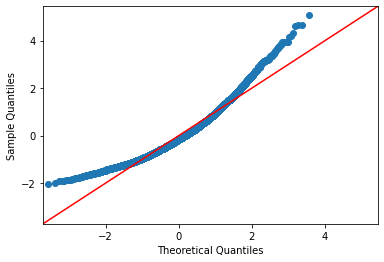

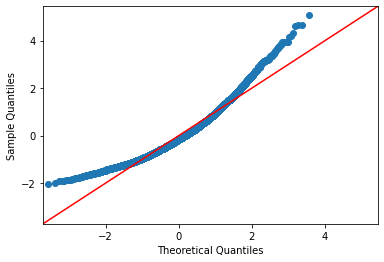

In [99]:
#fig,ax = plt.subplots(1,1,figsize=(12,12))
sm.graphics.qqplot(y_hat, dist=stats.norm, line='45', fit=True)
#sm.graphics.qqplot(y_hat, dist=stats.norm, line='45', fit=True,ax=ax[1])

# MODEL 4 -- NP.LOG PRICE

In [100]:
ohe = OneHotEncoder()

ohezip_train = ohe.fit_transform(Xtrain_processed[['zipcode']])
ohezip_test = ohe.transform(Xtest_processed[['zipcode']])

ohe_train = pd.DataFrame(ohezip_train.todense(), columns = ohe.get_feature_names_out())
ohe_test = pd.DataFrame(ohezip_test.todense(), columns = ohe.get_feature_names_out())

ohe_train.reset_index(inplace= True)
ohe_test.reset_index(inplace=True)

final_x_train = pd.concat([Xtrain_processed, ohe_train], axis =1)
final_x_test = pd.concat([Xtest_processed, ohe_test], axis =1)

final_x_train.drop('zipcode', axis =1, inplace = True)
final_x_test.drop('zipcode', axis =1, inplace = True)


lr = LinearRegression()

lr.fit(final_x_train, np.log(y_train))

lr.score(final_x_train,np.log(y_train))

0.8673739966857543

In [110]:
#final_x_train.drop(['level_0','index'],axis=1,inplace=True)
#final_x_train
#final_x_test.drop(['level_0','index'],axis=1,inplace=True)
final_x_test

y_hat = np.exp(lr.predict(final_x_test))
#y_hat

In [111]:
mean_absolute_error(y_test, y_hat)

70680.2306325561

In [112]:
mean_squared_error(y_test, y_hat,squared=False)

112291.62355292532

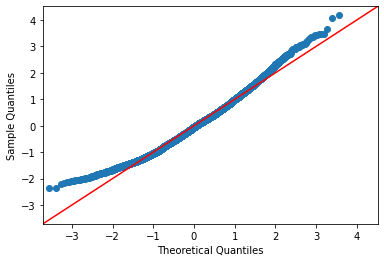

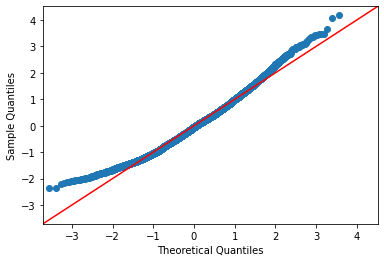

In [113]:
sm.graphics.qqplot(np.log(y_hat), dist=stats.norm, line='45', fit=True)


# MODEL 5

<AxesSubplot:>

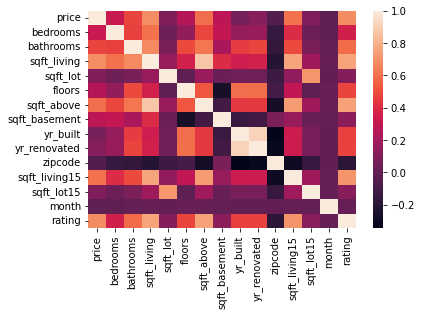

In [114]:
sns.heatmap(df.corr())

In [116]:
df.corr()>.6

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,month,rating
price,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False
sqft_living,True,False,True,True,False,False,True,False,False,False,False,True,False,False,True
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True
sqft_basement,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False


In [117]:
#sqft_living15, sqft_above, yr_renovated, sqft_lot15,month

In [119]:
ohe = OneHotEncoder()

final_x_train5 = final_x_train.drop(['sqft_above','sqft_lot15','sqft_basement','yr_renovated','rating','sqft_living15','month'],axis=1)
final_x_test5 = final_x_test.drop(['sqft_above','sqft_lot15','sqft_basement','yr_renovated','rating','sqft_living15','month'],axis=1)

#ohezip_train = ohe.fit_transform(Xtrain_processed[['zipcode']])
#ohezip_test = ohe.transform(Xtest_processed[['zipcode']])

#ohe_train = pd.DataFrame(ohezip_train.todense(), columns = ohe.get_feature_names_out())
#ohe_test = pd.DataFrame(ohezip_test.todense(), columns = ohe.get_feature_names_out())

#ohe_train.reset_index(inplace= True)
#ohe_test.reset_index(inplace=True)

#final_x_train = pd.concat([Xtrain_processed, ohe_train], axis =1)
#final_x_test = pd.concat([Xtest_processed, ohe_test], axis =1)

#final_x_train.drop('zipcode', axis =1, inplace = True)
#final_x_test.drop('zipcode', axis =1, inplace = True)


lr = LinearRegression()

lr.fit(final_x_train5, np.log(y_train))

lr.score(final_x_train5,np.log(y_train))

0.8601597038992717

In [120]:
y_hat = np.exp(lr.predict(final_x_test5))
y_hat

array([510436.90876276, 275533.52149879, 620161.47775041, ...,
       762319.00459636, 824623.41794448, 246897.87935637])

In [121]:
mean_absolute_error(y_test, y_hat)

72485.90191703638

In [122]:
mean_squared_error(y_test, y_hat,squared=False)

115728.29295211892

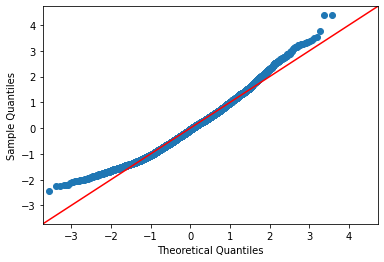

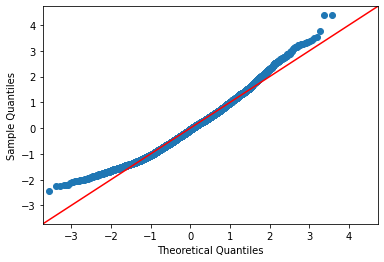

In [123]:
sm.graphics.qqplot(np.log(y_hat), dist=stats.norm, line='45', fit=True)

<AxesSubplot:xlabel='price'>

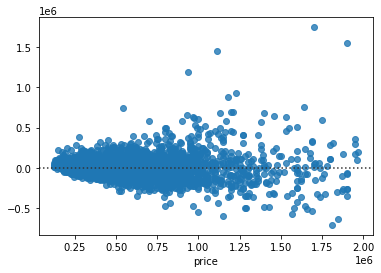

In [124]:
sns.residplot(x=y_test,y=y_hat)